## Simple Linear Regression

We will build a simple linear regression model to predict sales using tv as independent variable

## Understanding the data

Steps:
    1. Procuring the data
    2. Understanding the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("tvmarketing.csv")
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
TV       200 non-null float64
Sales    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [4]:
df.shape

(200, 2)

In [5]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


## Data Visualisation

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

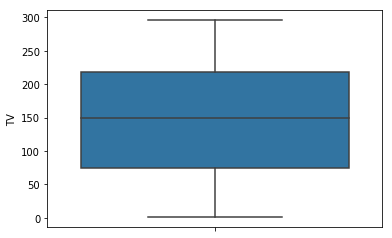

In [8]:
sns.boxplot(y=df['TV'])
plt.show()

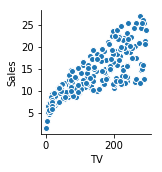

In [10]:
# scatter plot
sns.pairplot(df,x_vars=['TV'],y_vars='Sales',kind = 'scatter')

In [11]:
# Feature variable
X = df['TV']

#Responnse variable
y = df['Sales']

## Model building

In [12]:
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.70,random_state = 100) 

C:\Users\Vikash\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Linear model expect feature variables as ndarray. We will convert the feature variable as ndarray.

In [14]:
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

In [15]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [16]:
# Import LinearRegression model from sklearn library
from sklearn.linear_model import LinearRegression

lr= LinearRegression()

In [17]:
# fit the model
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# print the parameters
print(lr.intercept_)
print(lr.coef_)

6.989665857411679
[0.04649736]


## Prediction

In [20]:
y_pred = lr.predict(X_test)

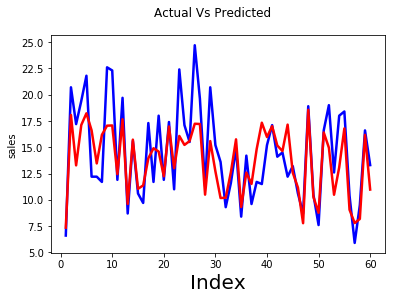

In [23]:
# Actual Vs Predicted
c = [i for i in range(1,61)]
fig=plt.figure()
plt.plot(c,y_test,color="blue",linewidth = 2.5,linestyle="-")
plt.plot(c,y_pred,color="red",linewidth = 2.5,linestyle="-")
fig.suptitle("Actual Vs Predicted")
plt.xlabel("Index",fontsize=20)
plt.ylabel("sales",fontsize=10)
plt.show()

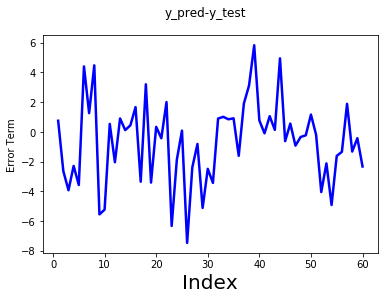

In [24]:
# Error terms
c = [i for i in range(1,61)]
fig = plt.figure()
plt.plot(c,y_pred-y_test,color = "blue",linewidth = 2.5, linestyle = "-")
fig.suptitle("y_pred-y_test")
plt.xlabel("Index",fontsize=20)
plt.ylabel("Error Term",fontsize=10)
plt.show()

In [25]:
# import the metrics
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test,y_pred)

print("Mean Square Error: ",mse)
print("r Square Error: ",r_squared)

Mean Square Error:  7.97579853285485
r Square Error:  0.5942987267783302


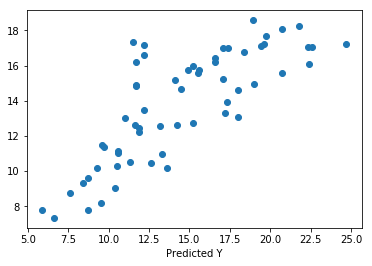

In [26]:
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.xlabel("Predicted Y")
plt.show()